In [6]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [2]:
# 1. Point to the folder and grab only your 1-min, 24-mo files
data_dir  = "data"
pattern   = os.path.join(data_dir, "*.csv")
file_list = sorted(glob.glob(pattern))

asset_dfs = []
for path in file_list:
    # 2. Derive ticker (e.g. "NVDA" from "NVDA_1min_24mo_20250611_1313.csv")
    fname  = os.path.basename(path)
    ticker = fname.split('_')[0].upper()
    
    # 3. Read & rename
    df_i = pd.read_csv(path, parse_dates=['timestamp'])
    df_i.set_index('timestamp', inplace=True)
    df_i.rename(columns={'close': f'{ticker}_close'}, inplace=True)
    
    asset_dfs.append(df_i[[f'{ticker}_close']])

# 4. Combine all tickers side-by-side
df_prices = pd.concat(asset_dfs, axis=1, join='outer')

# 5. Ensure a full 1-min index and handle missing spots
full_index = pd.date_range(
    start=df_prices.index.min(), 
    end=df_prices.index.max(), 
    freq='T', 
    tz=df_prices.index.tz
)
df_prices = df_prices.reindex(full_index)

/var/folders/6p/w656sb2s0hz7rlnsgzxx4yyc0000gn/T/ipykernel_31751/2669802860.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_index = pd.date_range(


In [13]:

# Forward-fill to carry last price forward, then back-fill leading NaNs
df_prices.ffill(inplace=True)
df_prices.bfill(inplace=True)

print("Final shape:", df_prices.shape)
print(df_prices.head(), df_prices.tail())

#Export the data to a csv file
df_prices.to_csv("data/closing_prices.csv")

Final shape: (1050721, 7)
                     AAPL_close  BTCUSDT_close  GLD_close  NVDA_close  \
2023-06-01 04:00:00    176.0671       26771.89     181.65     38.1234   
2023-06-01 04:01:00    176.0572       26765.66     181.73     38.0804   
2023-06-01 04:02:00    175.8097       26780.09     181.73     38.1344   
2023-06-01 04:03:00    175.8592       26787.79     181.73     38.1204   
2023-06-01 04:04:00    175.9285       26793.74     181.73     38.1264   

                     QQQ_close  SPY_close  TSLA_close  
2023-06-01 04:00:00   343.4202   407.3890      203.70  
2023-06-01 04:01:00   343.2228   407.2040      203.33  
2023-06-01 04:02:00   343.2425   407.2624      203.18  
2023-06-01 04:03:00   343.1142   407.1651      202.90  
2023-06-01 04:04:00   343.2129   407.2138      202.79                        AAPL_close  BTCUSDT_close  GLD_close  NVDA_close  \
2025-05-30 19:56:00    200.2200      104714.29     303.55    134.5100   
2025-05-30 19:57:00    200.2400      104670.03     30

In [4]:
#Print the data
print(df_prices.head())
print(df_prices.info())
print(df_prices.describe())

                     AAPL_close  BTCUSDT_close  GLD_close  NVDA_close  \
2023-06-01 04:00:00    176.0671       26771.89     181.65     38.1234   
2023-06-01 04:01:00    176.0572       26765.66     181.73     38.0804   
2023-06-01 04:02:00    175.8097       26780.09     181.73     38.1344   
2023-06-01 04:03:00    175.8592       26787.79     181.73     38.1204   
2023-06-01 04:04:00    175.9285       26793.74     181.73     38.1264   

                     QQQ_close  SPY_close  TSLA_close  
2023-06-01 04:00:00   343.4202   407.3890      203.70  
2023-06-01 04:01:00   343.2228   407.2040      203.33  
2023-06-01 04:02:00   343.2425   407.2624      203.18  
2023-06-01 04:03:00   343.1142   407.1651      202.90  
2023-06-01 04:04:00   343.2129   407.2138      202.79  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1050721 entries, 2023-06-01 04:00:00 to 2025-05-30 20:00:00
Freq: min
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         ----

In [5]:
#Function to count NaNs in a DataFrame
def count_nans(df):
    """
    Count NaNs in a DataFrame.

    Returns a tuple (per_column, total):
      - per_column: a Series giving the number of NaNs in each column
      - total: the grand total of NaNs in the entire DataFrame
    """
    # Count per column
    per_column = df.isna().sum()
    # Grand total
    total = int(per_column.sum())
    return per_column, total

# Example usage:
per_col, grand_total = count_nans(df_prices)
print("NaNs per column:\n", per_col)
print(f"Total NaNs in df_prices: {grand_total}")

NaNs per column:
 AAPL_close       0
BTCUSDT_close    0
GLD_close        0
NVDA_close       0
QQQ_close        0
SPY_close        0
TSLA_close       0
dtype: int64
Total NaNs in df_prices: 0


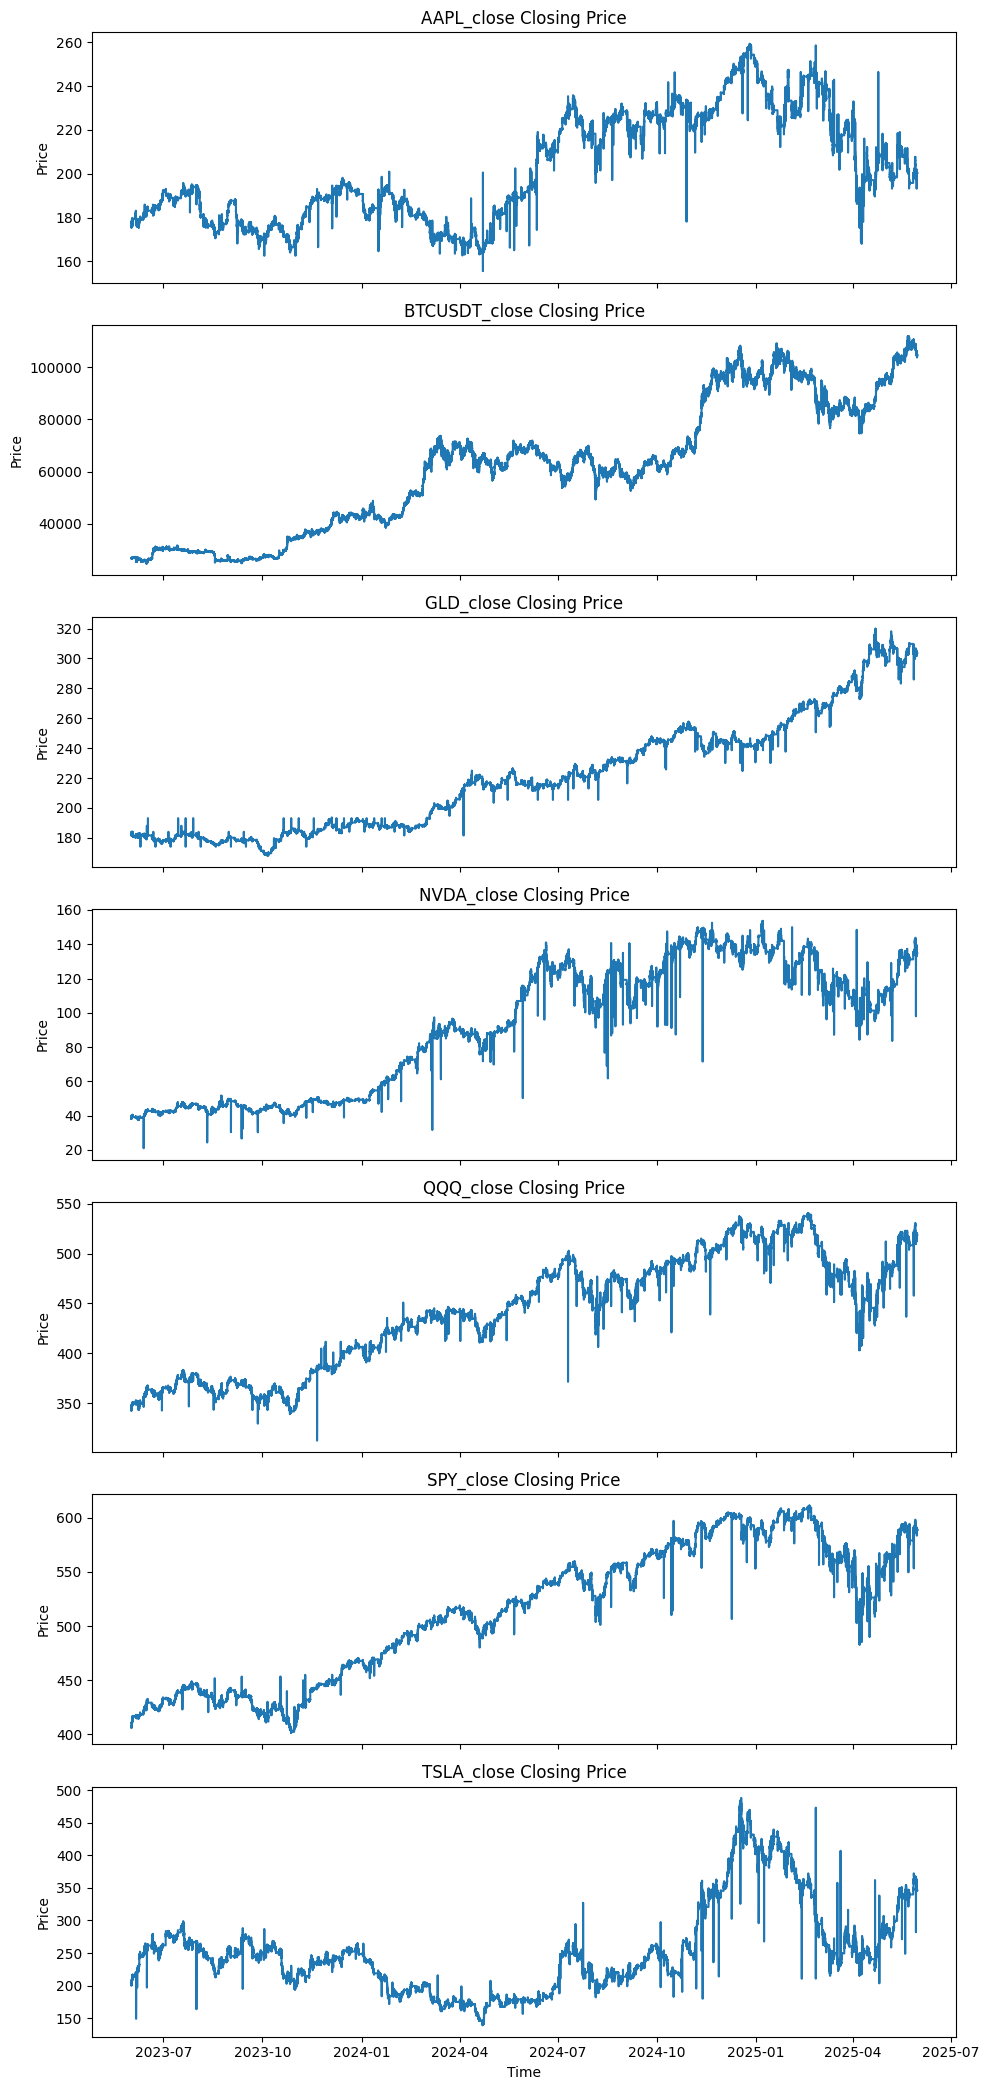

In [14]:
# Option B: A single figure with N rows of subplots
n = len(df_prices.columns)
fig, axes = plt.subplots(n, 1, sharex=True, figsize=(10, 3*n))
for ax, col in zip(axes, df_prices.columns):
    ax.plot(df_prices.index, df_prices[col])
    ax.set_title(f"{col} Closing Price")
    ax.set_ylabel("Price")
axes[-1].set_xlabel("Time")
plt.tight_layout()

plt.show()